# Desafio

Agora que você absorveu todo esse conhecimento, estou animada para te apresentar uma atividade prática incrível! O objetivo desta atividade é aplicar e aprimorar todas as habilidades que você adquiriu até agora.

Nesta atividade, vamos trabalhar com um conjunto de dados relacionado ao mesmo tema: doença cardíaca, mas com um desafio adicional! Agora, teremos um dataset com mais colunas e uma quantidade significativa de dados, ultrapassando 300 mil linhas.

Além disso, vamos enfrentar o desafio de lidar com colunas que contêm dados categóricos representados como strings e o desbalanceamento entre as classes.

Esses dados estão disponíveis no Kaggle. O conjunto de dados vem originalmente do CDC (Centers for Disease Control and Prevention) e é uma parte importante do Sistema de Vigilância de Fatores de Risco Comportamentais, que realiza pesquisas telefônicas anuais para coletar dados sobre o estado de saúde dos residentes dos Estados Unidos.

Nós vamos trabalhar com os dados coletados em 2020, que estão disponíveis na seguinte url:

    url = https://raw.githubusercontent.com/vqrca/heart_disease/main/Data/heart_2020_cleaned.csv

A seguir temos uma explicação do que são cada uma das colunas:

- HeartDisease: Entrevistados que já relataram ter doença cardíaca coronariana ou infarto do miocárdio.

- BMI: Índice de Massa Corporal (IMC).

- Smoking: Indica se a pessoa fumou pelo menos 100 cigarros em toda a sua vida? [Nota: 5 maços = 100 cigarros].

- AlcoholDrinking: Indicam pessoas do sexo masculino que bebem mais de 14 bebidas por semana e pessoas do sexo feminino que bebem mais de 7 bebidas por semana.

- Stroke: Indica se a pessoa já teve um derrame.

- PhysicalHealth: Indica o número de dias em que a pessoa teve doenças e lesões físicas nos últimos 30 dias.

- MentalHealth: Indica o número de dias em que a pessoa não teve a saúde mental boa nos últimos 30 dias.

- DiffWalking: Indica sérias dificuldades para caminhar ou subir escadas.

- Sex: Sexo biológico.

- AgeCategory: Categoria da idade.

- Race: Raça.

- Diabetic: Indica se a pessoa tem ou já teve diabetes.

- PhysicalActivity: Indica se a pessoa relatou fazer atividade física ou exercício durante os últimos 30 dias além do seu trabalho regular.

- GenHealth: Indica como a pessoa considera sua saúde geral.

- SleepTime: Média de horas dormidas por dia.

- Asthma: Indica se a pessoa tem ou já teve asma.

- KidneyDisease: Indica se a pessoa já teve doença renal (Não incluindo cálculos renais, infecção da bexiga ou incontinência).

- SkinCancer: Indica se a pessoa tem ou já teve câncer de pele.

Agora que identificamos as variáveis disponíveis e o nosso objetivo de prever a coluna HeartDisease, precisamos seguir algumas etapas importantes:

1 - Verificar se temos dados nulos ou duplicados no dataset:

Caso existam dados nulos ou duplicados é necessário realizar o tratamento.

2 - Transformar Dados de Texto para Numéricos:

Para que nosso modelo compreenda os dados, é necessário converter valores do tipo string para valores numéricos.

3 - Avaliar o Balanceamento dos Dados:

Verificaremos como estão distribuídos os dados entre as classes da coluna HeartDisease. Caso exista um desequilíbrio, será necessário desenvolver uma estratégia para balancear essas classes, assegurando que o modelo seja treinado de maneira justa e precisa.

Para balancear os dados, uma classe que poderia ser usada é RandomUnderSampler da biblioteca imblearn. Você pode explorar a documentação dessa biblioteca e fique à vontade para testar outras classes.

4 - Criar um Modelo com XGBClassifier e analisar as métricas de classificação:

Utilizaremos o algoritmo XGBClassifier para construir nosso modelo preditivo.

5 - Otimizar hiperparâmetros com RandomizedSearchCV e analisar as métricas após o modelo ter sido ajustado:

Ajustaremos os hiperparâmetros do nosso modelo para otimizar o desempenho. Isso envolve encontrar a combinação ideal de configurações que maximize a precisão e a generalização do modelo. A ideia é utilizar o RandomizedSearchCV, pois temos um conjunto muito grande de dados e uma busca em grade demandaria muito tempo.

Seguindo essas etapas, estaremos preparando nossos dados, construindo um modelo e ajustando os hiperparâmetros!

E aí, bora colocar as mãos na massa?

## Análise da base

In [135]:
# for reproducibility
RANDOM_STATE = 123

In [118]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/vqrca/heart_disease/main/Data/heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [120]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [121]:
df['HeartDisease'].value_counts(normalize=True)

No     0.914405
Yes    0.085595
Name: HeartDisease, dtype: float64

In [122]:
df.duplicated().sum()

18078

Não há presença de dados nulos. 

Há a presença de cerca de 18 mil dados duplicados. Como a base possui mais de 319 mil entradas, podemos **remover esses dados duplicados** sem grande impacto.

A maioria das colunas não é numérica e precisam ser **codificadas**.

O target é a coluna `HeartDisease`, e é a primeira coluna da base. Ela está altamente desbalanceada, com somente 8% das entradas sendo da classe que já teve uma doença cardíaca. Será necessário **aplicar alguma técnica de sampling para balanceamento**.

### Remoção de dados duplicados

In [123]:
print(f'Original database: {df.shape[0]} entries.')
print(f'Duplicates: {df.duplicated().sum()}')
df.drop_duplicates(inplace=True, ignore_index=True) # ignore_index will reset the index
print(f'Database without duplicates: {df.shape[0]}')

Original database: 319795 entries.


Duplicates: 18078
Database without duplicates: 301717


### Codificação colunas categóricas

Para a variável alvo (coluna `HeartDisease`), vou fazer um mapeamento simples para seus valores (0 para `No` e 1 para `Yes`). Vou aplicar a codificação no restante das colunas categóricas.

In [124]:
df['HeartDisease'].unique()

array(['No', 'Yes'], dtype=object)

In [125]:
df['HeartDisease'] = df['HeartDisease'].map({
    'No': 0,
    'Yes': 1
})

df['HeartDisease'].unique()

array([0, 1], dtype=int64)

In [126]:
print('Colunas categóricas:')
cat_cols = df.select_dtypes(include=[object]).columns
for col in cat_cols:
    print(f'Valores coluna {col}: {df[col].unique()}')

Colunas categóricas:
Valores coluna Smoking: ['Yes' 'No']
Valores coluna AlcoholDrinking: ['No' 'Yes']
Valores coluna Stroke: ['No' 'Yes']
Valores coluna DiffWalking: ['No' 'Yes']
Valores coluna Sex: ['Female' 'Male']
Valores coluna AgeCategory: ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Valores coluna Race: ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Valores coluna Diabetic: ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
Valores coluna PhysicalActivity: ['Yes' 'No']
Valores coluna GenHealth: ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
Valores coluna Asthma: ['Yes' 'No']
Valores coluna KidneyDisease: ['No' 'Yes']
Valores coluna SkinCancer: ['Yes' 'No']


In [127]:
df_cat_cols = df[cat_cols]
df_cat_cols.head()

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No


Vou aplicar o OneHotEncoder nas colunas categóricas, mantendo somente 1 coluna quando é uma categoria binária (yes/no, male/female).

In [128]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(drop='if_binary')

encoded_arr = cat_encoder.fit_transform(df_cat_cols)

Criando um dataframe com as colunas codificadas:

In [129]:
df_cat_cols_encoded = pd.DataFrame(encoded_arr.toarray(), columns=cat_encoder.get_feature_names_out(df_cat_cols.columns))

Modificando a base original para conter as colunas categóricas codificadas:

In [130]:
df = pd.concat([df.drop(cat_cols, axis=1), df_cat_cols_encoded], axis=1)
df.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,0,16.60,3.0,30.0,5.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,0,20.34,0.0,0.0,7.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,26.58,20.0,30.0,8.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,24.21,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0,23.71,28.0,0.0,8.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Separação e balanceamento dos dados

In [131]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE, stratify=y)

A diferença de balanceamento entre as duas classes é muito alta. Aplicar o undersampling resultaria em eliminar muitos dados da classe negativa. Aplicar o oversampling implicaria na criação de uma quantidade muito grande de dados sintéticos. Minha ideia era ir por um meio termo com o SMOTEENN, que faz o oversampling da classe minoritária e depois aplica um undersampling em ambas as classes para remoção de "ruído" e outliers. No entanto, a aplicação do SMOTEENN demora muito nesse dataset (mais de 220 mil entradas no treinamento), então fiquei com a sugestão do desafio e apliquei o RandomUnderSampler.

O código abaixo compara o tamanho dos datasets ao aplicar uma técnica de undersampling, uma de oversampling e uma combinação de under e oversampling. Ele demorou cerca de **12 minutos**. Descomente caso queira ver os resultados.

In [149]:
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import SMOTE
# from imblearn.combine import SMOTEENN

# samplers = [
#     RandomUnderSampler(random_state=RANDOM_STATE),
#     SMOTE(random_state=RANDOM_STATE),
#     SMOTEENN(random_state=RANDOM_STATE)
# ]

# for sampler in samplers:
#     X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

#     print(f'X_train: {X_train.shape[0]}')
#     print(f'X_resampled: {X_resampled.shape[0]}')
#     print(f'y_train: {y_train.size}')
#     print(f'y_resampled: {y_resampled.size}')
#     print('\nVariável alvo antes:')
#     print(y_train.value_counts())
#     print('\nVariável alvo depois:')
#     print(y_resampled.value_counts())
#     print('\n\n')

Saída do código acima:

```
X_train: 226287
X_resampled: 40892
y_train: 226287
y_resampled: 40892

Variável alvo antes:
0    205841
1     20446
Name: HeartDisease, dtype: int64

Variável alvo depois:
0    20446
1    20446
Name: HeartDisease, dtype: int64



X_train: 226287
X_resampled: 411682
y_train: 226287
y_resampled: 411682

Variável alvo antes:
0    205841
1     20446
Name: HeartDisease, dtype: int64

Variável alvo depois:
0    205841
1    205841
Name: HeartDisease, dtype: int64



X_train: 226287
X_resampled: 333517
y_train: 226287
y_resampled: 333517

Variável alvo antes:
0    205841
1     20446
Name: HeartDisease, dtype: int64

Variável alvo depois:
1    191856
0    141661
Name: HeartDisease, dtype: int64
```

In [150]:
from imblearn.under_sampling import RandomUnderSampler

sampler = RandomUnderSampler(random_state=RANDOM_STATE)
X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

## Modelagem

In [152]:
import xgboost as xgb

model = xgb.XGBClassifier(random_state=RANDOM_STATE)
model.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)

              precision    recall  f1-score   support

           0       0.97      0.72      0.83     68615
           1       0.22      0.79      0.34      6815

    accuracy                           0.73     75430
   macro avg       0.60      0.76      0.59     75430
weighted avg       0.90      0.73      0.79     75430



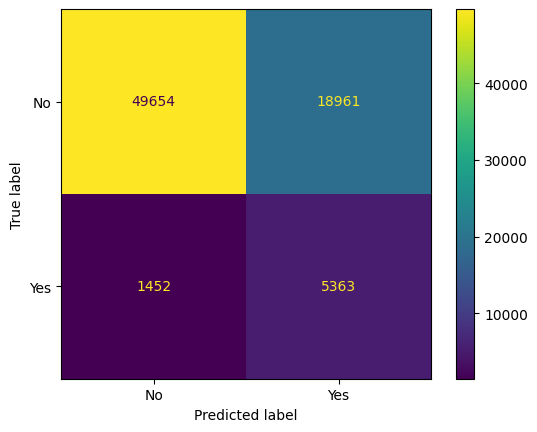

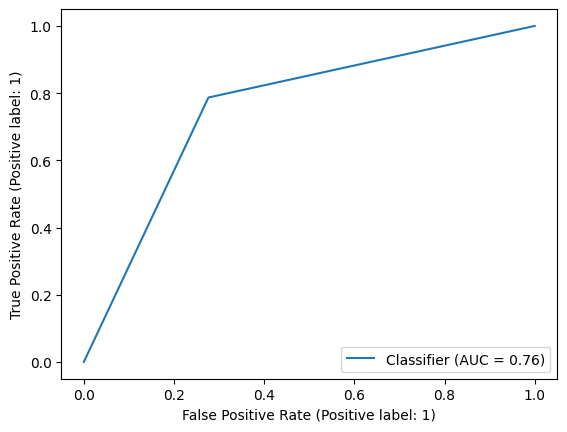

In [157]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='.0f', display_labels=['No', 'Yes'])
RocCurveDisplay.from_predictions(y_test, y_pred);

Apesar de um recall razoável (0.79) para identificação positiva de uma doença cardíaca, a precisão está bem baixa (0.22), ou seja, o modelo está classificando com doença cardíaca pessoas que não tem a doença.

## Otimização de hiperparâmetros

Vou utilizar os mesmo hiperparâmetros e intervalos do curso.

In [159]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'colsample_bytree': [0.1, 0.5, 1],
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [0, 2, 4, 6, 10],
    'n_estimators': [10, 25, 50]
}

rand_search_cv = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(random_state=RANDOM_STATE),
    param_distributions=params,
    n_iter=10,
    cv=5,
    scoring='recall'
)

rand_search_cv.fit(X_resampled, y_resampled)

print(f'Melhores hiperparâmetros encontrados: {rand_search_cv.best_params_}')

Melhores hiperparâmetros encontrados: {'n_estimators': 10, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 1}


Criando o modelo otimizado com os melhores hiperparâmetros encontrados:

In [160]:
model_optimized = xgb.XGBClassifier(random_state=RANDOM_STATE, **rand_search_cv.best_params_)
model_optimized.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)

Avaliação do modelo otimizado:

              precision    recall  f1-score   support

           0       0.97      0.72      0.82     68615
           1       0.22      0.80      0.34      6815

    accuracy                           0.72     75430
   macro avg       0.60      0.76      0.58     75430
weighted avg       0.90      0.72      0.78     75430



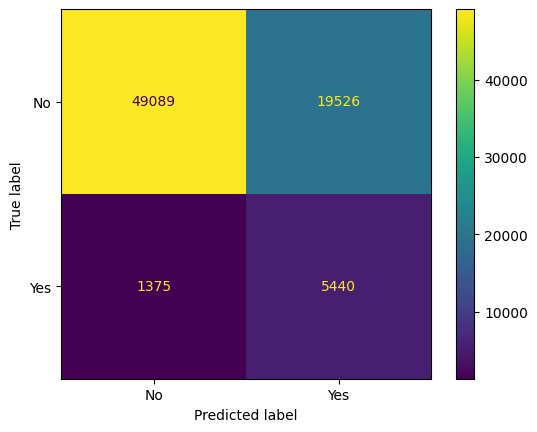

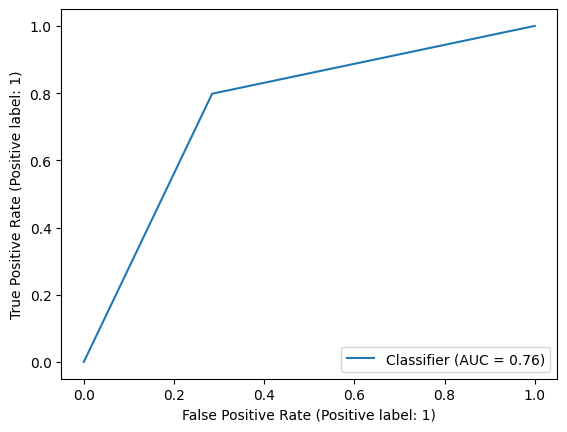

In [161]:
y_pred = model_optimized.predict(X_test)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='.0f', display_labels=['No', 'Yes'])
RocCurveDisplay.from_predictions(y_test, y_pred);

Os resultados foram bem próximos do modelo sem otimização, com uma leve melhora no recall da classe positiva (+0.01), e uma leve queda na acurácia (-0.01).